## Understanding Melbourne Suburbs

Melbourne has experienced a vast housing market bubble which recently cooled off.
The Australian definition of a "suburb" is more what we'd call a "neighborhood" in the US. This dataset lists over 300 "suburbs" of Melbourne.

In this project I'll attempt to understand what makes a neighborhood "hot," through clustering and understanding each cluster.

This dataset is from Kaggle.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [38]:
df=pd.read_csv('Melbourne_housing_full.csv')
#df=df.dropna()

In [39]:
df['Type'].value_counts()

h    23964
u     7297
t     3578
Name: Type, dtype: int64

In [40]:
#Showing the largest suburbs
groupedBurbs= df.groupby('Suburb')['Price'].agg(np.median)
print(groupedBurbs.sort_values(ascending=False))

Suburb
Canterbury         2300000.0
Malvern            1995000.0
Middle Park        1880000.0
Camberwell         1830000.0
Balwyn             1810000.0
Albert Park        1810000.0
Brighton           1792500.0
Kew East           1754500.0
Deepdene           1750000.0
Ivanhoe East       1745000.0
Balwyn North       1727500.0
Eaglemont          1718500.0
Beaumaris          1660000.0
Sandringham        1650000.0
Brighton East      1650000.0
Ashburton          1601000.0
McKinnon           1600000.0
Hampton            1580000.0
Princes Hill       1575000.0
Kew                1565000.0
Surrey Hills       1550000.0
Glen Iris          1528800.0
Kooyong            1508000.0
Malvern East       1500000.0
Alphington         1488500.0
Mont Albert        1481000.0
Carlton North      1412500.0
Templestowe        1390000.0
Mount Waverley     1386000.0
Wonga Park         1357500.0
                     ...    
Tarneit             526000.0
Cranbourne West     523625.0
Sunbury             520000.0
Doveton

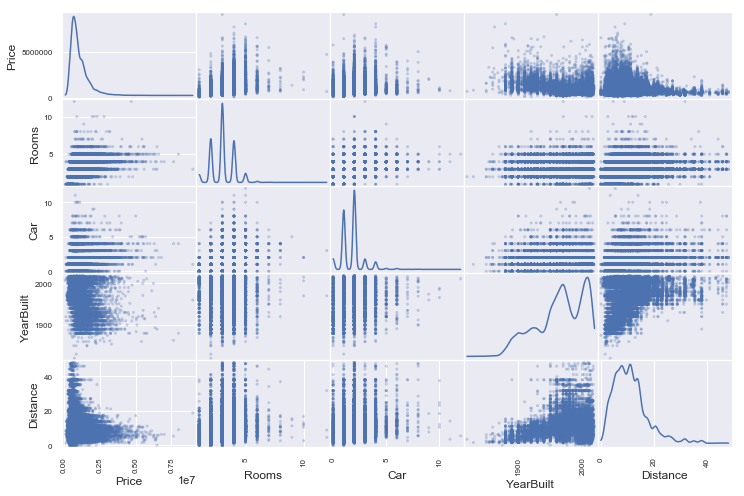

In [370]:
pd.plotting.scatter_matrix(df[['Price','Rooms','Car','YearBuilt','Distance']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');
#Note: need to normalize building area, land size and year built

In [366]:
print(df['Landsize'].max())

Suburb
Abbotsford             4829.0
Aberfeldie             1715.0
Airport West           1063.0
Albanvale               619.0
Albert Park            1488.0
Albion                 2347.0
Alphington             1134.0
Altona                 1057.0
Altona Meadows          808.0
Altona North           1068.0
Ardeer                  739.0
Armadale               3093.0
Ascot Vale             3215.0
Ashburton              1472.0
Ashwood                 981.0
Aspendale              3931.0
Aspendale Gardens       667.0
Attwood                 760.0
Avondale Heights       1801.0
Avonsleigh             1008.0
Bacchus Marsh          1107.0
Balaclava              2283.0
Balwyn                 2051.0
Balwyn North          75100.0
Bayswater              1267.0
Bayswater North         931.0
Beaconsfield            900.0
Beaconsfield Upper     1031.0
Beaumaris              8000.0
Belgrave               1651.0
                       ...   
Wallan                23970.0
Wandin North          40500.0
Wan

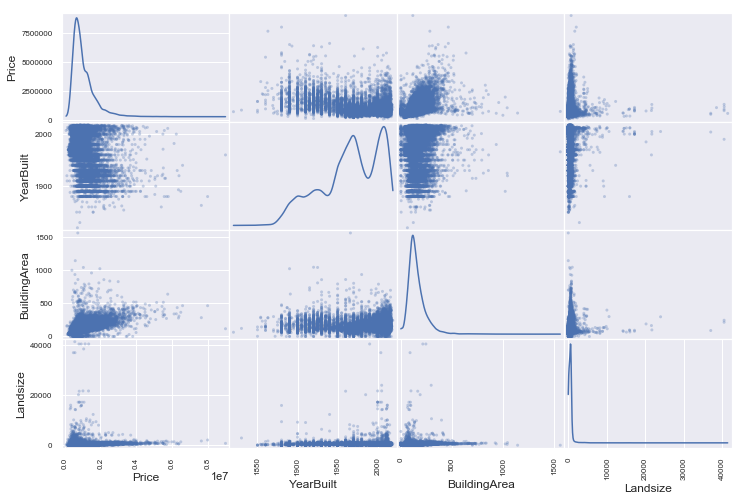

In [374]:
pd.plotting.scatter_matrix(df[['Price','YearBuilt', 'BuildingArea','Landsize']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');
#There are some observations to be cleaned here.

In [41]:
#Create new dataframe of aggregate values for each suburb
med_price = pd.DataFrame(df.groupby('Suburb')['Price'].agg(np.mean), columns=['Suburb','Price'])
med_distance = pd.DataFrame(df.groupby('Suburb')['Distance'].agg(np.mean), columns=['Suburb','Distance'])
med_lot = pd.DataFrame(df.groupby('Suburb')['Landsize'].agg(np.mean), columns=['Suburb','Landsize'])
med_year= pd.DataFrame(df.groupby('Suburb')['YearBuilt'].agg(np.mean), columns=['Suburb','YearBuilt'])
med_sqft=pd.DataFrame(df.groupby('Suburb')['BuildingArea'].agg(np.mean), columns=['Suburb','BuildingArea'])
burbs=df['Suburb'].unique()
print(len(burbs))

350


In [42]:
from pandas import DataFrame
subdf= DataFrame()
subdf['Price']=med_price.Price
subdf['Distance']= med_distance.Distance
subdf['Lot Size']= med_lot.Landsize
subdf['Year']=med_year.YearBuilt
subdf['SqFt']=med_sqft.BuildingArea
subdf['Suburb']=burbs
subdf=subdf.dropna()
print(subdf.Suburb)

Suburb
Abbotsford                    Mulgrave
Aberfeldie                  Canterbury
Airport West                  Hawthorn
Albanvale                     Armadale
Albert Park                    Malvern
Albion                             Kew
Alphington                   Melbourne
Altona                          Toorak
Altona Meadows             Middle Park
Altona North              Malvern East
Ardeer                      Camberwell
Armadale                      Brighton
Ascot Vale                   Glen Iris
Ashburton                  South Yarra
Ashwood                         Balwyn
Aspendale                    Parkville
Aspendale Gardens              Carlton
Attwood                       St Kilda
Avondale Heights               Mitcham
Bacchus Marsh                 Box Hill
Balaclava                  Sandringham
Balwyn                 South Melbourne
Balwyn North            East Melbourne
Bayswater                      Hampton
Bayswater North              Northcote
Beaconsfield      

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
X= subdf[['Lot Size','Year','SqFt','Distance','Price']]
data = pd.DataFrame(scale(X), columns=['Lot Size','Year','SqFt','Distance','Price'])

pca = PCA(n_components=4).fit(data)
pca_samples= pca.transform(data)
print(data.head())

   Lot Size      Year      SqFt  Distance     Price
0 -0.198012 -1.557625 -1.384739 -1.358752  0.290556
1 -0.124980  0.200914  0.527942 -0.808018  1.074982
2 -0.158447  0.464871 -0.598330 -0.465791 -0.518353
3 -0.128627  0.317554 -0.827671 -0.253826 -1.135556
4 -0.260412 -3.148383 -0.603903 -1.313388  2.853583


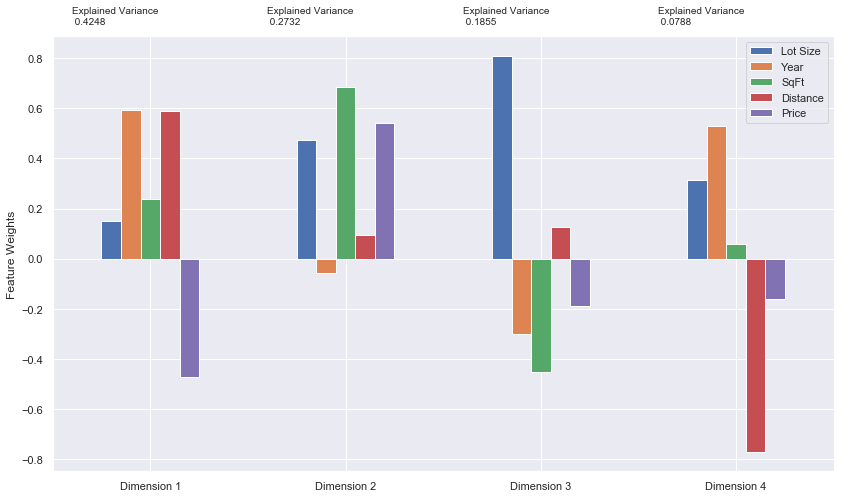

In [44]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [45]:
pca_results.cumsum()

,Explained Variance,Lot Size,Year,SqFt,Distance,Price
Dimension 1,0.4248,0.1499,0.5942,0.2369,0.5870,-0.4731
Dimension 2,0.6980,0.6250,0.5386,0.9208,0.6832,0.0693
Dimension 3,0.8835,1.4325,0.2379,0.4680,0.8111,-0.1206
Dimension 4,0.9623,1.7472,0.7675,0.5272,0.0420,-0.2803


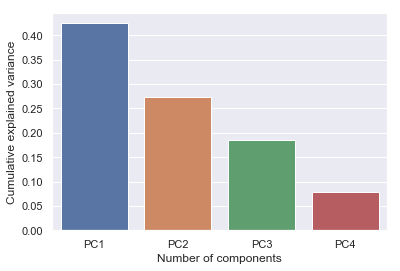

In [46]:
dfvar = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var",  
           data=dfvar);
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [47]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [48]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax


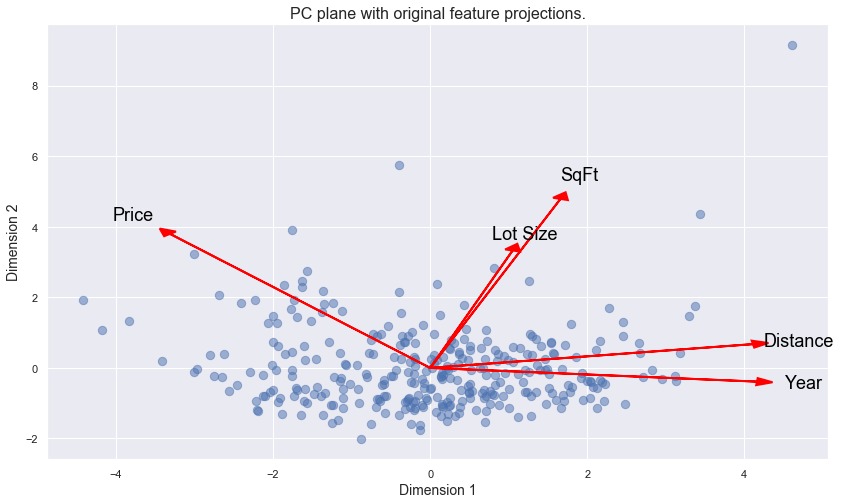

In [49]:
biplot(data, reduced_data, pca)

## Interpreting the Biplot

So we got the biplot function to work. Each vector on a biplot is the loading scores of the first 2 principal components for that feature.
If two features are right next to each other, like Lot Size and SqFt, it means they're strongly correlated. Including both Lot Size and SqFt in a machine learning model would be redundant.

If two features are pointing in the opposite direction, they're negatively correlated. A high 'Year' value (meaning) a newer house, is *strongly* negatively correlated with a high price.

### Important: length of the vectors
Notice 'Price', 'Distance' and 'Year' have very long loading vectors. It indicates a large weight in the first principal component score. See the bar chart above.

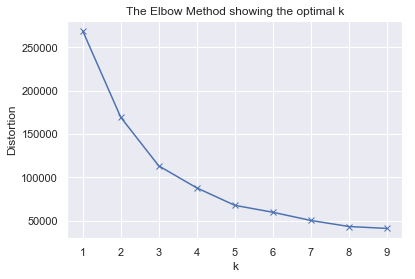

In [50]:
#Determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

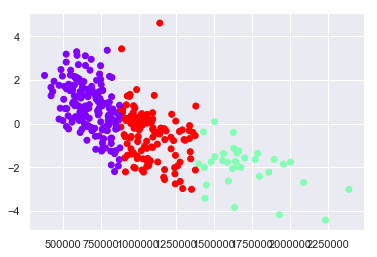

In [51]:
#Now begin clustering the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_
data['cluster'] = pd.Series(labels)

plt.scatter(X['Price'],reduced_data['Dimension 1'], c=kmeans.labels_, cmap='rainbow')  

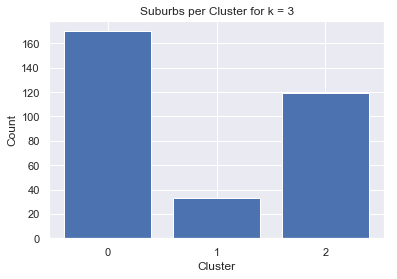

In [52]:
clusters = KMeans(n_clusters = 3, random_state=1).fit(X)

counts = [0 for i in range(3)]
for i in range(3):
    for label in clusters.labels_:
        if label == i:
            counts[i] += 1

plt.bar(range(3), counts)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks([0,1,2])
plt.title("Suburbs per Cluster for k = 3")
plt.show();

In [53]:
X['Cluster']= kmeans.labels_

19.91653326293401 680672.2593324996 154.07184604309964 652.8956386060931 1982.923596362033


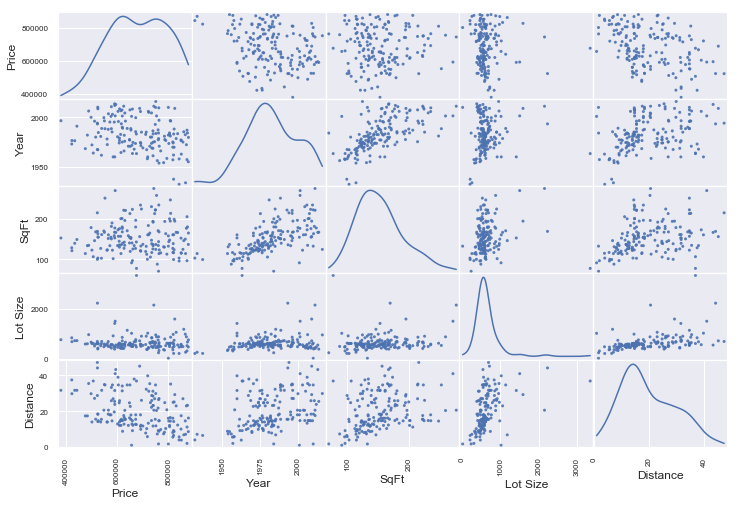

In [406]:
#plot the distribution of features for each cluster.
X0 = X[X['Cluster']==0]
pd.plotting.scatter_matrix(X0[['Price','Year', 'SqFt','Lot Size', 'Distance']], alpha = 0.9,figsize = (12,8), diagonal = 'kde');
#Cluster 1 has newer homes that are cheaper in price and very far from the city center. They're built on large lots but have small square footage.
#These are very suburban-style post-war houses.

8.75427505030656 1699675.8280420415 196.06965872384555 600.8125116781946 1951.4611775089747


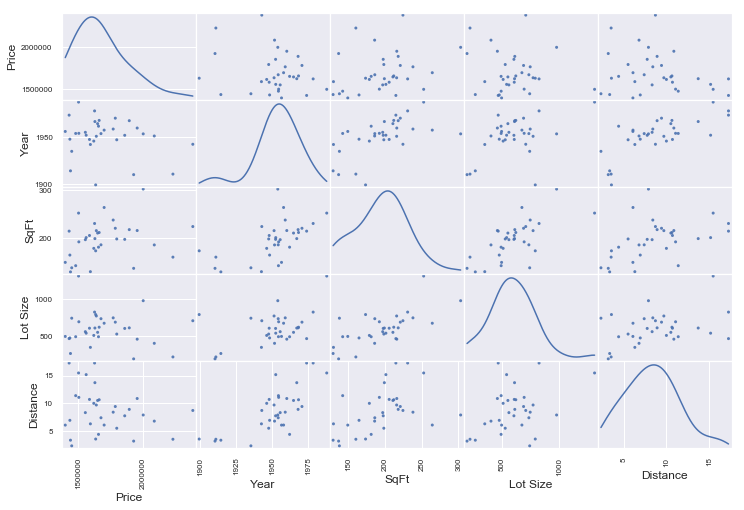

In [405]:
X1 = X[X['Cluster']==1]
pd.plotting.scatter_matrix(X1[['Price','Year', 'SqFt','Lot Size', 'Distance']], alpha = 0.9,figsize = (12,8), diagonal = 'kde');
print(np.mean(X1.Distance), np.mean(X1.Price), np.mean(X1.SqFt), np.mean(X1['Lot Size']), np.mean(X1.Year))

12.599983118890856 1078439.0170621187 161.185008137084 616.0872647934259 1967.925896927112


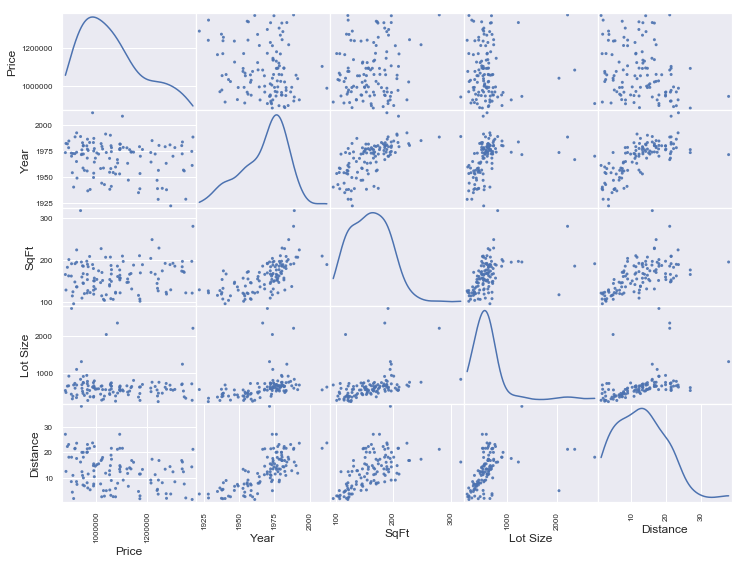

In [404]:
X2 = X[X['Cluster']==2]

pd.plotting.scatter_matrix(X2[['Price','Year', 'SqFt','Lot Size', 'Distance']], alpha = 0.9,figsize = (12,9), diagonal = 'kde');
print(np.mean(X2.Distance), np.mean(X2.Price), np.mean(X2.SqFt), np.mean(X2['Lot Size']), np.mean(X2.Year))

In [303]:
#Graph all clusters together
#sns.pairplot(X[['Price','Year', 'SqFt','Lot Size']], diag_kind='kde', hue=X.Cluster);

In [31]:
lotsizes= X.groupby('Suburb')['Lot Size']
print(X['Lot Size'].sort_values(ascending=False))
#X = X.drop(['Gisborne South', 'Wonga Park', 'Bullengarook', 'New Gisborne','Diggers Rest', 'Gisborne', 'Riddells Creek'])

Suburb
Gisborne South        40468.500000
Wonga Park            19650.000000
Gisborne               5955.666667
Bullengarook           4000.000000
Emerald                3344.250000
Research               2753.500000
North Warrandyte       2353.666667
Riddells Creek         2335.750000
Wallan                 2233.375000
Warrandyte             2210.909091
Mickleham              2155.666667
Travancore             2039.500000
Upwey                  1596.500000
Langwarrin             1509.750000
Mount Evelyn           1421.333333
Templestowe            1310.981818
Frankston South        1297.138889
Donvale                1227.418605
Maribyrnong            1186.969697
Cranbourne             1145.714286
Clarinda               1084.666667
Croydon North          1065.722222
Beaconsfield Upper     1031.000000
Southbank              1025.622642
Lower Plenty            991.692308
Boronia                 981.696970
Deepdene                979.714286
Whittlesea              972.000000
Lilydale     

In [259]:
print(X['SqFt'].sort_values(ascending=False))
#Now go back and examine the new scatterplots

Suburb
Hampton East        357.566667
Bulleen             336.673077
Frankston South     327.884615
St Helena           317.800000
Deepdene            303.000000
Warrandyte          280.333333
Mickleham           276.000000
Langwarrin          270.666667
Kooyong             264.400000
Greenvale           258.704200
Templestowe         252.666667
Skye                252.000000
Vermont South       248.526316
Keilor              247.500000
Ivanhoe East        238.086957
Derrimut            234.966667
Taylors Hill        234.772727
Beaumaris           230.866667
Cairnlea            230.840833
Glen Waverley       228.582222
Wheelers Hill       228.481250
Notting Hill        227.000000
Hurstbridge         225.000000
Canterbury          224.460714
Point Cook          224.158133
Rowville            223.956522
Botanic Ridge       223.000000
Taylors Lakes       222.452632
Williams Landing    222.000000
Keilor Lodge        221.500000
                       ...    
Albion              114.666667
C

In [54]:
from pandas import pivot_table
table = pivot_table(X, index=['Cluster'], aggfunc=np.mean)
table

,Distance,Lot Size,Price,SqFt,Year
Cluster,,,,,
0,20.442615,694.820713,6.799473e+05,155.052705,1983.148924
1,8.754275,600.812512,1.699676e+06,196.069659,1951.461178
2,13.265530,1139.366577,1.079704e+06,164.327403,1967.751294


## Analysis of Clusters

Cluster 1 has newer homes that are cheaper in price and very far from the city center. They're built on large lots but have small square footage.
These are very suburban-style post-war houses.

Cluster 3 has slightly older and more expensive homes that are somewhat close to the city center. They're built on medium-sized lots.

Cluster 2 has older, expensive homes very close to the city center. They're built on smaller lots but have large square footage. They represent a variety of housing types (detached, townhome, condo).


In [55]:
#See the housing types in each cluster.
newdf = df.merge(X, on='Suburb', how='outer')
table2 = pivot_table(newdf, index=['Cluster', 'Type'], aggfunc='count')
table2

Address  Bathroom  Bedroom2  BuildingArea   Car  CouncilArea  \
Cluster Type                                                                 
0.0     h        9389      7945      7946          4125  7811         9389   
        t        1184       603       603           386   603         1184   
        u        2215      1167      1167           666  1162         2214   
1.0     h        4522      3751      3754          1886  3688         4521   
        t         627       387       387           183   387          627   
        u        1317       806       806           339   802         1317   
2.0     h        9956      8679      8681          4390  8394         9956   
        t        1758       951       953           561   949         1758   
        u        3742      2299      2300          1192  2292         3742   

              Date  Distance_x  Distance_y  Landsize    ...      Price_x  \
Cluster Type                                            ...                
0.0     h     9389        9389        9389      6671    ...         7815   
        t     1184        1184        1184       497    ...          995   
        u     2215        2215        2215       993    ...         1830   
1.0     h     4522        4522        4522      3347    ...         2899   
        t      627         627         627       330    ...          464   
        u     1317        1317        1317       702    ...         1039   
2.0     h     9956        9956        9956      7642    ...         7674   
        t     1758        1758        1758       782    ...         1397   
        u     3742        3742        3742      2047    ...         3023   

              Price_y  Propertycount  Regionname  Rooms  SellerG  SqFt  \
Cluster Type                                                             
0.0     h        9389           9389        9389   9389     9389  9389   
        t        1184           1184        1184   1184     1184  1184   
        u        2215           2214        2214   2215     2215  2215   
1.0     h        4522           4521        4521   4522     4522  4522   
        t         627            627         627    627      627   627   
        u        1317           1317        1317   1317     1317  1317   
2.0     h        9956           9956        9956   9955     9956  9956   
        t        1758           1758        1758   1758     1758  1758   
        u        3742           3742        3742   3742     3742  3742   

              Suburb  Year  YearBuilt  
Cluster Type                           
0.0     h       9389  9389       4475  
        t       1184  1184        417  
        u       2215  2215        817  
1.0     h       4522  4522       2153  
        t        627   627        215  
        u       1317  1317        487  
2.0     h       9956  9956       4815  
        t       1758  1758        644  
        u       3742  3742       1518  

[9 rows x 23 columns]

## Conclusions

It seems that the most valuable communities here have a mixture of apartments, houses and townhouses. It would probably be beneficial to a developer to build a mixture of housing types in a neighborhood.

## K-Nearest Neighbors Experiment
I feel like KNN (in a regression setting) is the next logical step from PCA and Clustering, and a sort of intermediary step between EDA and predictive machine learning.

In [88]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,34838.000000,2.723500e+04,34838.000000,34838.000000,26622.000000,26613.000000,26112.000000,23030.000000,13732.000000,15546.000000,34836.000000
mean,3.030254,1.049693e+06,11.178279,3115.983323,3.084178,1.624357,1.726869,550.621581,154.898591,1965.334234,7574.086922
std,0.967273,6.385517e+05,6.775134,108.909027,0.980490,0.723853,0.993796,1117.636623,88.913011,36.778402,4427.669119
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1820.000000,121.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,520.000000,136.000000,1970.000000,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,669.000000,187.000000,2000.000000,10412.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,12.000000,41400.000000,1561.000000,2019.000000,21650.000000


In [174]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df1=df[['YearBuilt','BuildingArea','Distance','Landsize', 'Bathroom','CouncilArea']]
df1= df1.dropna()
print(df1.describe())
print(df1.CouncilArea.unique())
X = df1[['YearBuilt','BuildingArea','Distance','Landsize', 'Bathroom']]
y = df1['CouncilArea']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

          YearBuilt  BuildingArea      Distance      Landsize      Bathroom
count  11696.000000  11696.000000  11696.000000  11696.000000  11696.000000
mean    1963.731447    152.641755     11.014244    523.331224      1.677069
std       37.295340     83.213405      6.814725    936.597762      0.740641
min     1830.000000      0.000000      0.000000      0.000000      1.000000
25%     1940.000000    101.000000      6.300000    214.000000      1.000000
50%     1970.000000    135.000000      9.900000    482.000000      2.000000
75%     1999.000000    185.000000     13.900000    657.000000      2.000000
max     2019.000000   1561.000000     48.100000  40469.000000      9.000000
['Monash City Council' 'Boroondara City Council'
 'Port Phillip City Council' 'Stonnington City Council'
 'Melbourne City Council' 'Bayside City Council' 'Whitehorse City Council'
 'Yarra City Council' 'Moonee Valley City Council' 'Banyule City Council'
 'Maribyrnong City Council' 'Moreland City Council'
 'Manningh

In [176]:
# instantiate learning model (testing different amounts for k to get the best)
knn = KNC(n_neighbors=55)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

0.2033678756476684


## KNN Yielding a Poor Score: Interpretation

20% is obviously unacceptable for a machine learning model. Sometimes the "failure" of a certain model teaches you a lot, though. What I make of this, is that we have 31 different Council Areas and many have groups of similar houses. This is *reasonable.* 

Perhaps, instead of looking at how similar the observations are in a p-dimensional space (where p is the # of predictors) we should *filter* the data through a series of criteria. This process is the "decision tree" classifier.

In [177]:
#Now try boosted trees
from xgboost import XGBClassifier as XGBC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = XGBC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.707324023938444


## Wow, 71% accuracy *untuned.* What do we learn from the difference in scores?

Completely untuned, XGBoost gets a 71% accuracy compared to KNN's 20% accuracy. So what does that tell us?

1. Boosted Trees is an extremely smart algorithm, and it's safe to assume with a little effort you could get 90% accuracy.
2. If we can take our data through a series of steps to narrow down the possibilities, classification accuracy immediately goes up. 
3. KNN yields a poor score because our data is *nuanced*. When you're trying to predict a neighborhood or urban area, the boundaries that define each area were arbitrarily drawn and have little "numerical" sense behind them. If we were trying to predict a feature that had more logical patterns, it's possible KNN would get better results.